## DATA CLEANING

En este apartado se realizaran las etapas de preprocesamiento de datos.

Trabajaremos con con nuestra tabla de hechos que se encuentra en snowflake y github.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../esperanza_vida/datasets/EV.csv')

In [5]:
df.head()

,ID_PAIS,ANIO,ID_INDICADOR,VALOR,ID_CONTINENTE,ID_INCOME
0,ARG,1992,1,591.0,1,M
1,ARG,1993,1,NaN,1,M
2,ARG,1994,1,NaN,1,M
3,ARG,1995,1,NaN,1,M
4,ARG,1996,1,NaN,1,M


Una vez ingestados nuestros datos (df), primero observamos si tenemos instancias duplicadas.

In [109]:
df[df.duplicated()]

,ID_PAIS,ANIO,ID_INDICADOR,VALOR,ID_CONTINENTE,ID_INCOME
39824,LBY,2012,24,NaN,4,M
39861,LBY,2013,24,NaN,4,M
39898,LBY,2014,24,NaN,4,M
39935,LBY,2015,24,NaN,4,M
39972,LBY,2016,24,NaN,4,M
40009,LBY,2017,24,NaN,4,M
40046,LBY,2018,24,NaN,4,M
40083,LBY,2019,24,NaN,4,M


In [110]:
# Corroboramos, al azar, una fila de la máscara empleada en la celda anterior.

df[df.ID_INDICADOR == 24]

,ID_PAIS,ANIO,ID_INDICADOR,VALOR,ID_CONTINENTE,ID_INCOME
24420,ARG,1992,24,NaN,1,M
24421,ARG,1993,24,NaN,1,M
24422,ARG,1994,24,NaN,1,M
24423,ARG,1995,24,NaN,1,M
24424,ARG,1996,24,NaN,1,M
...,...,...,...,...,...,...
40103,DEU,2019,24,11.70,2,H
40104,GBR,2019,24,10.15,2,H
40105,NOR,2019,24,10.52,2,H
40106,SWE,2019,24,10.87,2,H


In [111]:
print('La cantidad de registros duplicados es:', df.duplicated().sum())

La cantidad de registros duplicados es: 8


In [112]:
# Los eliminamos

df.drop_duplicates(inplace = True)

In [113]:
df.shape

(40100, 6)

## Tratamiento de datos faltantes.

In [8]:
import missingno as msno

Observemos exploratoriamente nuestros datos faltantes

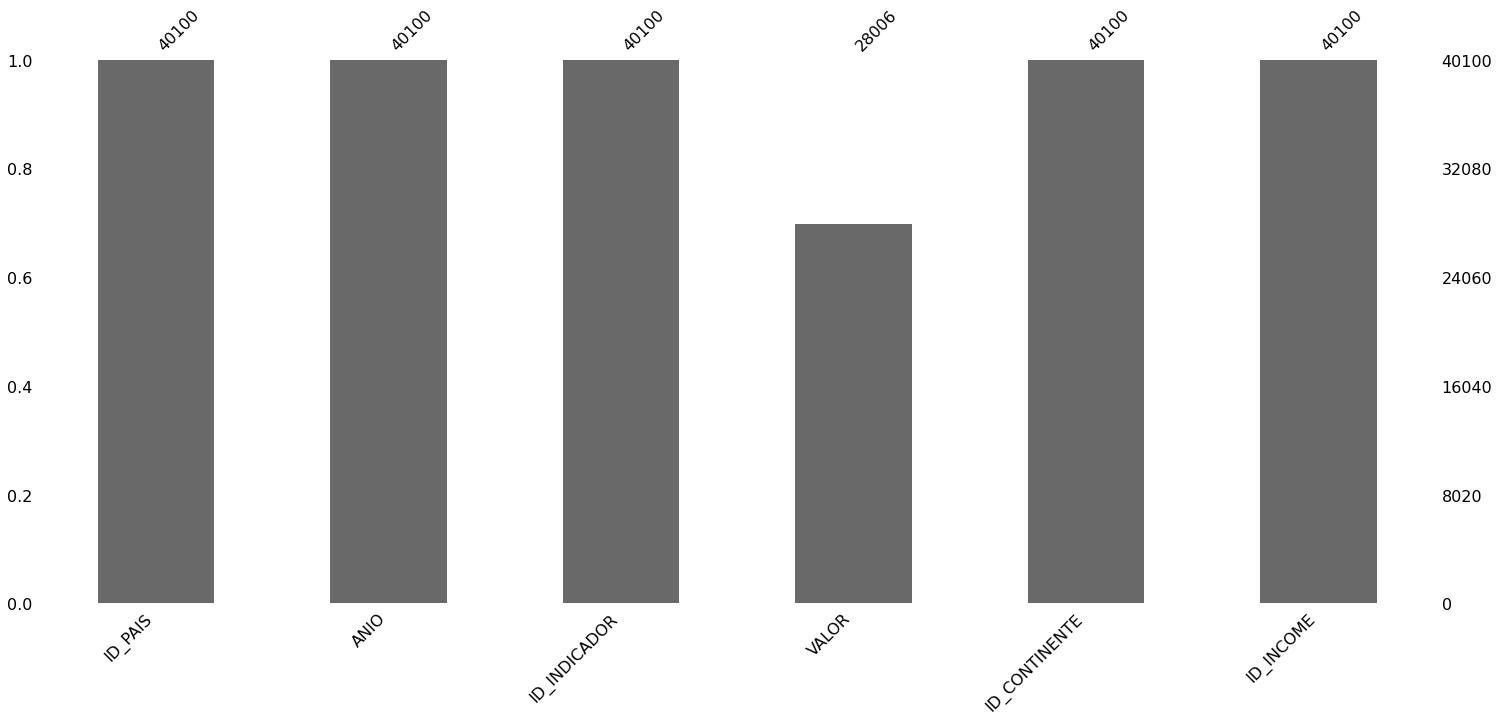

In [114]:
msno.bar(df)
plt.show()

Analicemos la columna `VALOR`, que la matriz ya nos da un indicio de gran cantidad de faltantes.

In [115]:
print('Porcentaje de valores faltantes de la variable VALOR:', (df.VALOR.isnull().sum()/len(df)) * 100)

Porcentaje de valores faltantes de la variable VALOR: 30.159600997506235


Parece ser que varios indicadores tienen datos faltantes en la columna 'VALOR' por lo que eliminaremos aquellos con mas de 20% de datos faltantes.

In [116]:
indicadores = df['ID_INDICADOR'].unique()

In [117]:
indicadores.sort()

In [118]:
indicadores

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 17, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38], dtype=int64)

In [119]:
# sacamos el indicador 12 tambien por la redundancia en indicadores
Ind_out = [16]
for i in indicadores:
    x = (df[df['ID_INDICADOR'] == i].VALOR.isnull().sum()/len(df[df['ID_INDICADOR'] == i])) * 100
    if x > 20:
        Ind_out.append(i)
    

In [120]:
Ind_out

[12, 1, 4, 5, 6, 10, 15, 16, 17, 21, 22, 23, 24, 29, 30, 32, 35, 36, 37]

In [121]:
len(Ind_out)

19

In [122]:
# Sacamos los indicadores dentro de Ind_Out
for i in Ind_out:
    df = df[df['ID_INDICADOR'] != i]

In [123]:
df.head()

,ID_PAIS,ANIO,ID_INDICADOR,VALOR,ID_CONTINENTE,ID_INCOME
1110,ARG,1992,38,3.712379,1,M
1111,ARG,1993,38,3.956405,1,M
1112,ARG,1994,38,4.055469,1,M
1113,ARG,1995,38,4.280636,1,M
1114,ARG,1996,38,4.526610,1,M


In [124]:
df.shape

(18278, 6)

Ahora observemos nuevamente como quedaron nuestros datos faltantes en la columna 'VALOR'

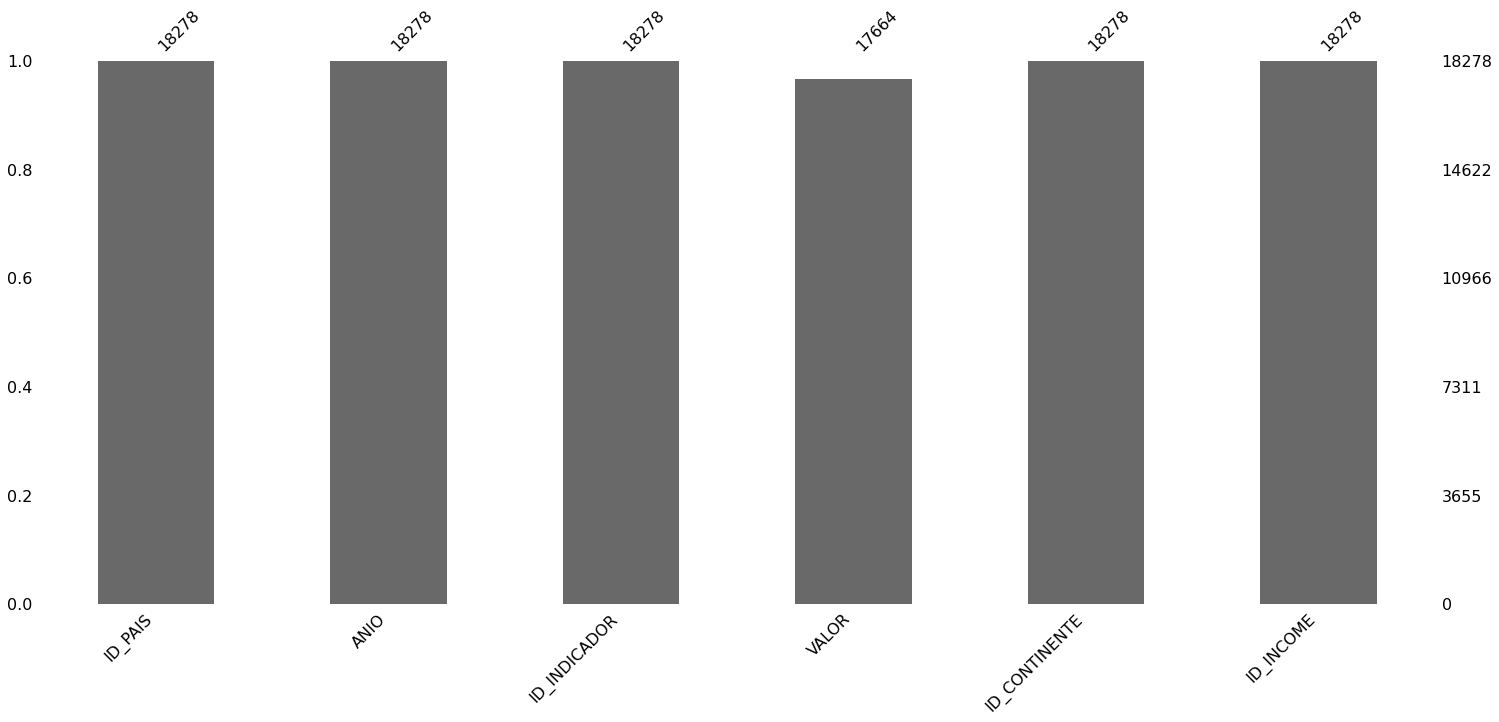

In [125]:
msno.bar(df)
plt.show()

Parece ser que aun quedan algunos:

In [126]:
print('Porcentaje de valores faltantes de la variable VALOR:', (df.VALOR.isnull().sum()/len(df)) * 100)

Porcentaje de valores faltantes de la variable VALOR: 3.3592296750191486


## Tratamiento de variables categóricas.

Como lo que estamos tratando son datos dentro de una serie de tiempo no sería adecuado reemplazar estos datos faltantes con su media o alguna otra métrica ya que si el valor faltantes se encuentra cerca del máximo o del mínimo esto podria no ser adecuado y podriamos generar outliers.
Lo adecuando en este caso es usar un algoritmo de ML como KNNImputer para hacer un reemplazo de los mismos de manera mas adecuada.

In [127]:
df1 = df.copy()

In [128]:
#Observemos los valores de ID_INCOME
df1['ID_INCOME'].value_counts()

H     8892
M     4940
LM    4446
Name: ID_INCOME, dtype: int64

In [129]:
df1['ID_PAIS'].value_counts()

ARG    494
JPN    494
LBY    494
MAR    494
MEX    494
MYS    494
NGA    494
NOR    494
PAN    494
PER    494
RUS    494
SAU    494
SWE    494
THA    494
TUR    494
URY    494
USA    494
KOR    494
ITA    494
AUS    494
ISR    494
BGR    494
BOL    494
BRA    494
CAN    494
CHL    494
CHN    494
CRI    494
DEU    494
EGY    494
ESP    494
FRA    494
GBR    494
GRC    494
IDN    494
IND    494
ZAF    494
Name: ID_PAIS, dtype: int64

Las convertimos en variables numéricas.

In [130]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  

df1['ID_PAIS'] = label_encoder.fit_transform(df1['ID_PAIS'])
df1['ID_INCOME'] = label_encoder.fit_transform(df1['ID_INCOME'])

In [131]:
df1.head()

,ID_PAIS,ANIO,ID_INDICADOR,VALOR,ID_CONTINENTE,ID_INCOME
1110,0,1992,38,3.712379,1,2
1111,0,1993,38,3.956405,1,2
1112,0,1994,38,4.055469,1,2
1113,0,1995,38,4.280636,1,2
1114,0,1996,38,4.526610,1,2


In [132]:
df1['ID_INCOME'].value_counts()

0    8892
2    4940
1    4446
Name: ID_INCOME, dtype: int64

In [133]:
df1['ID_PAIS'].value_counts()

0     494
19    494
21    494
22    494
23    494
24    494
25    494
26    494
27    494
28    494
29    494
30    494
31    494
32    494
33    494
34    494
35    494
20    494
18    494
1     494
17    494
2     494
3     494
4     494
5     494
6     494
7     494
8     494
9     494
10    494
11    494
12    494
13    494
14    494
15    494
16    494
36    494
Name: ID_PAIS, dtype: int64

Reemplazamos los Valores faltantes con KNNImputer

In [68]:
from sklearn.impute import KNNImputer


In [134]:
imputer = KNNImputer(n_neighbors=2, weights='distance')
after = imputer.fit_transform(df1)

In [135]:
after.shape

(18278, 6)

In [136]:
columnas = df1.columns.values

Creamos un Data Frame usando 'after' que tiene los datos imputados.

In [137]:
df2 = pd.DataFrame(after, columns=columnas)

In [138]:
df2.head()

,ID_PAIS,ANIO,ID_INDICADOR,VALOR,ID_CONTINENTE,ID_INCOME
0,0.0,1992.0,38.0,3.712379,1.0,2.0
1,0.0,1993.0,38.0,3.956405,1.0,2.0
2,0.0,1994.0,38.0,4.055469,1.0,2.0
3,0.0,1995.0,38.0,4.280636,1.0,2.0
4,0.0,1996.0,38.0,4.526610,1.0,2.0


Observemos ahora nuestros datos faltantes (si es que los hay).

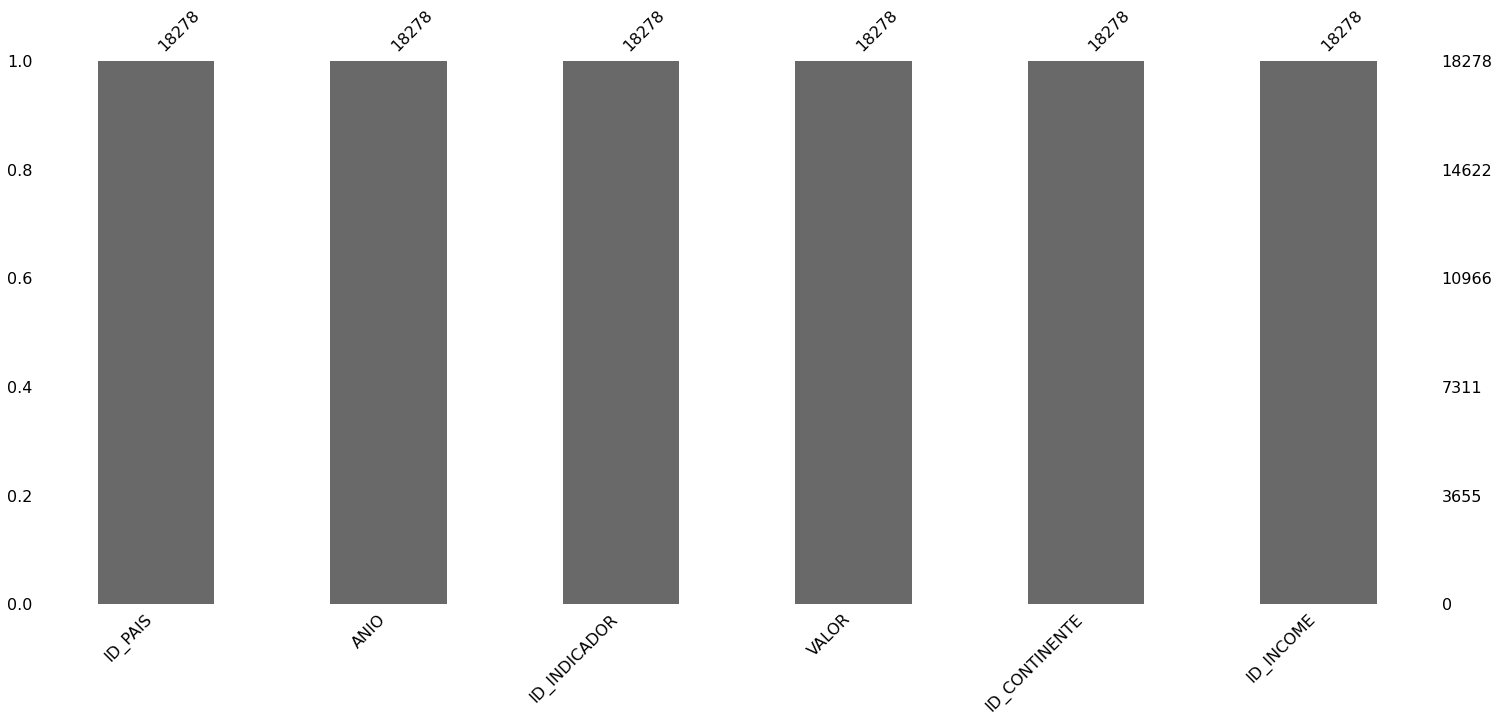

In [139]:
msno.bar(df2)
plt.show()

In [140]:
print('Porcentaje de valores faltantes de la variable VALOR:', (df2.VALOR.isnull().sum()/len(df2)) * 100)

Porcentaje de valores faltantes de la variable VALOR: 0.0


No queda muy comodo y facil de identificar los paises convertidos en numericos, para no afectar el esquema del proyecto se mantendra el formato original de las variables categoricas pero cambiaremos la columna 'VALOR'

In [141]:
df['VALOR'] = df2['VALOR'].values

In [142]:
df.head()

,ID_PAIS,ANIO,ID_INDICADOR,VALOR,ID_CONTINENTE,ID_INCOME
1110,ARG,1992,38,3.712379,1,M
1111,ARG,1993,38,3.956405,1,M
1112,ARG,1994,38,4.055469,1,M
1113,ARG,1995,38,4.280636,1,M
1114,ARG,1996,38,4.526610,1,M


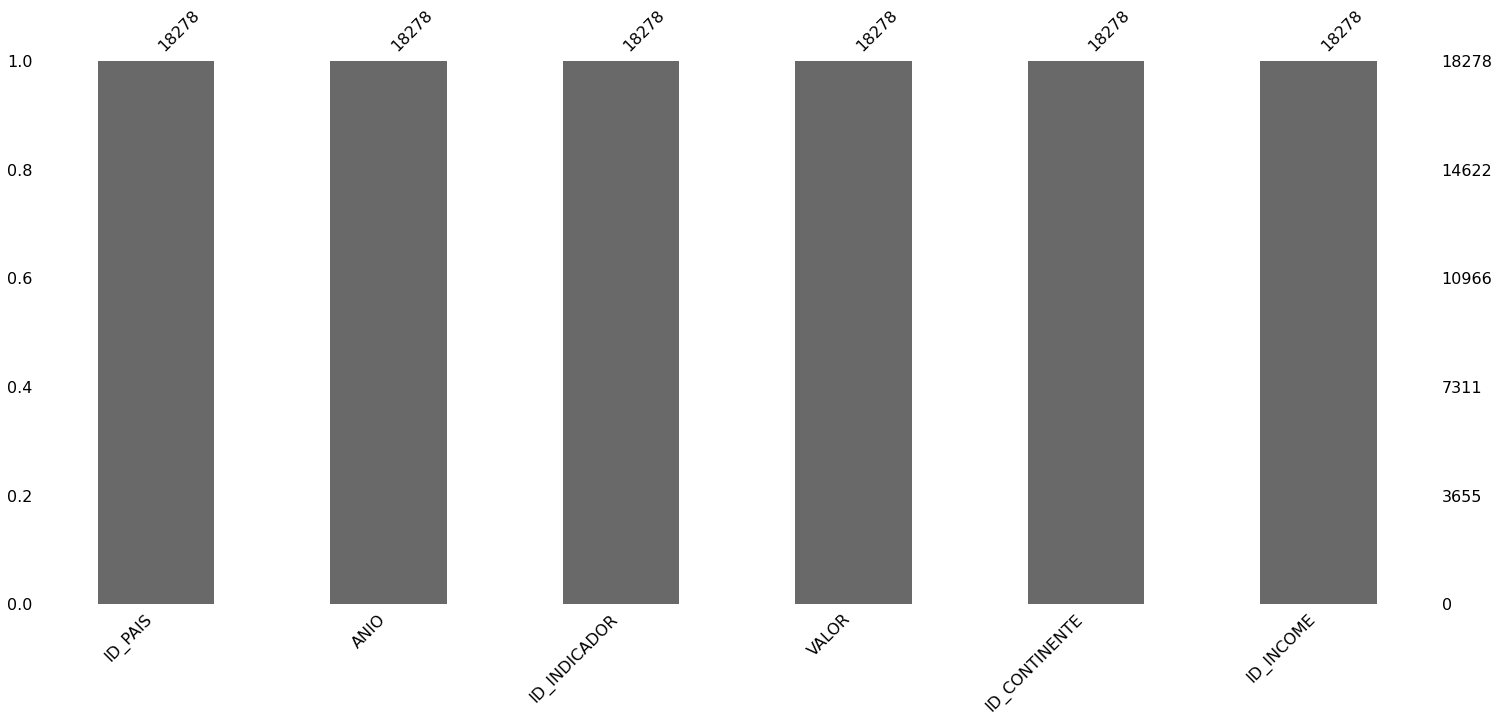

In [143]:
msno.bar(df)
plt.show()

Ahora podemos observar que los datos faltantes se imputaron exitosamente.

Pasaremos a crear un archivo .csv con nuestros datos limpios y listos para trabajar.

In [146]:
df.to_csv('hechos_limpia.csv')